# Support Vector Machine (SVM)


Bu algoritmayı iris çiçekleri üzerinden giderek uygulayacağız.

Konu makalesi; 
https://medium.com/deep-learning-turkiye/nedir-bu-destek-vekt%C3%B6r-makineleri-makine-%C3%B6%C4%9Frenmesi-serisi-2-94e576e4223e

Öncelikle Petal uzunluğuna ve derinliğine bakarak çiçeğin Setosa mı yoksa Versicolor mı olduğunu gösteren veri setinde bu iki grubu birbirinden ayırmak için bir çizgi çekebiliriz. Ancak şekildeki gibi üç çizginin de hepsi uyumlu
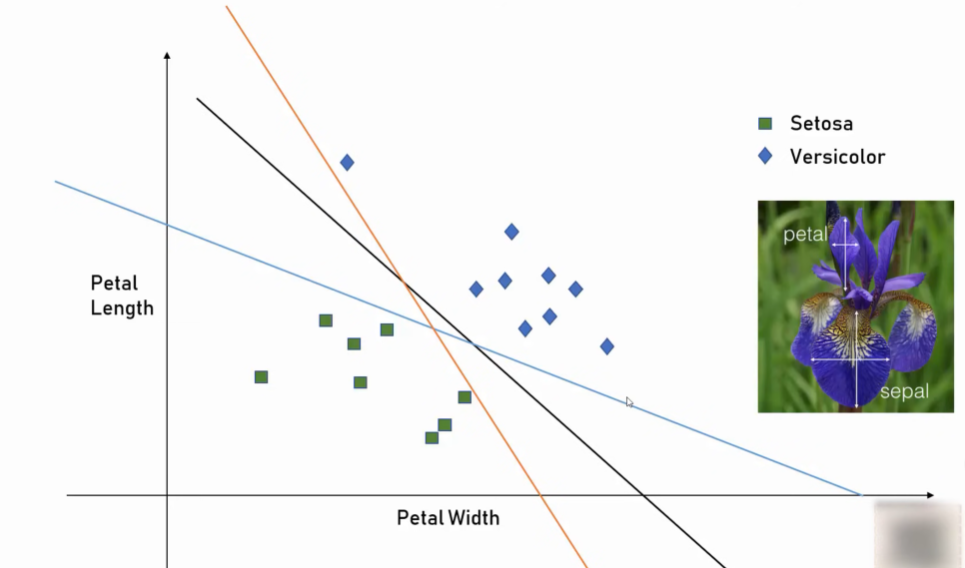

Bunlardan hangisinin daha başarılı uygun olduğu nasıl anlaşılır. 

Bunun için bir yol
verilerin doğrulara uzaklığı hesaplanabilir. 
Hangisinin daha küçük olduğu görülebilir.

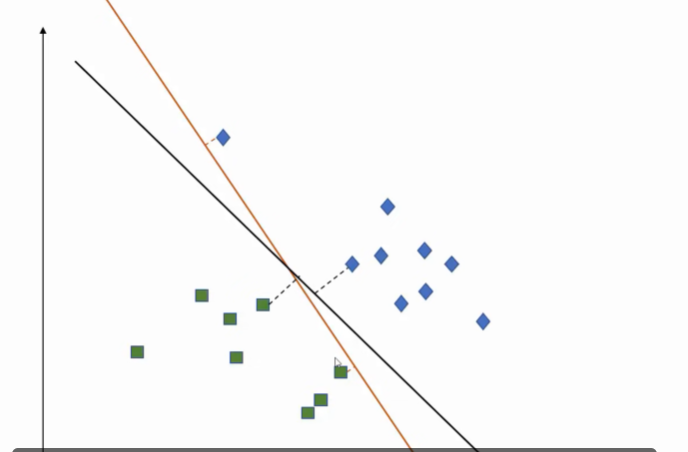


Support vector Machine (SVM) yaptığı şey budur.
noktalar ile çizginin kendisi arasındaki margin değerini maksimize etmeye çalışır. 
* (Bir düzlem üzerine yerleştirilmiş noktaları ayırmak için bir doğru çizer. Bu doğrunun, iki sınıfının noktaları için de maksimum uzaklıkta olmasını amaçlar. Karmaşık ama küçük ve orta ölçekteki veri setleri için uygundur.)


veri noktalarına support vectors denir. 
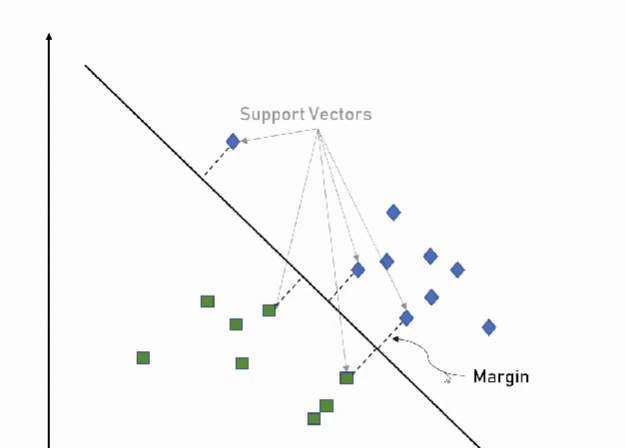

Bazı terimleri bilmek gerekiyor. 
* Gamma and Regularization  

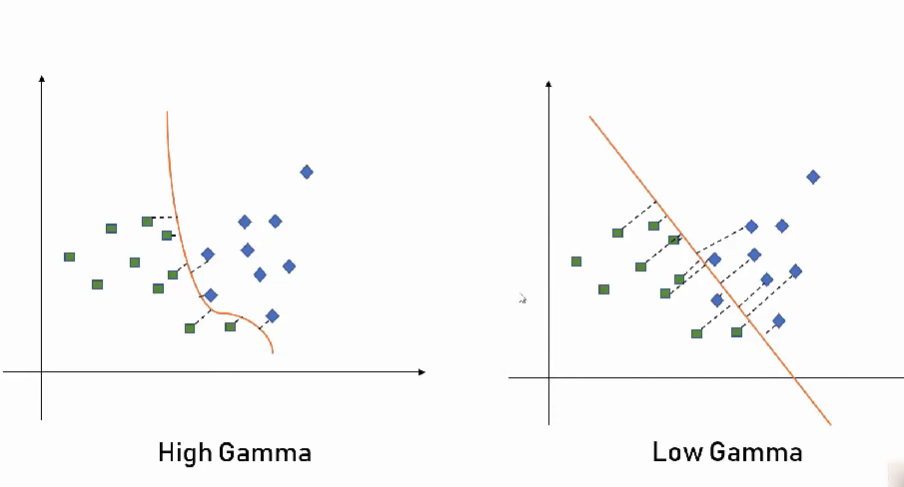
* Gamma ne kadar küçükse dağılım o kadar geniş olur.
* model overfit olmuşsa gamma değerini düşürmemiz, model underfit olmuşsa gamma değerini yükseltmemiz gerekir.
* RBF Kernel tercih edilir.

iki yöntem de geçerlidir ancak low Gamma bazen doğruluk(kesinlik) problemine neden olabilir.


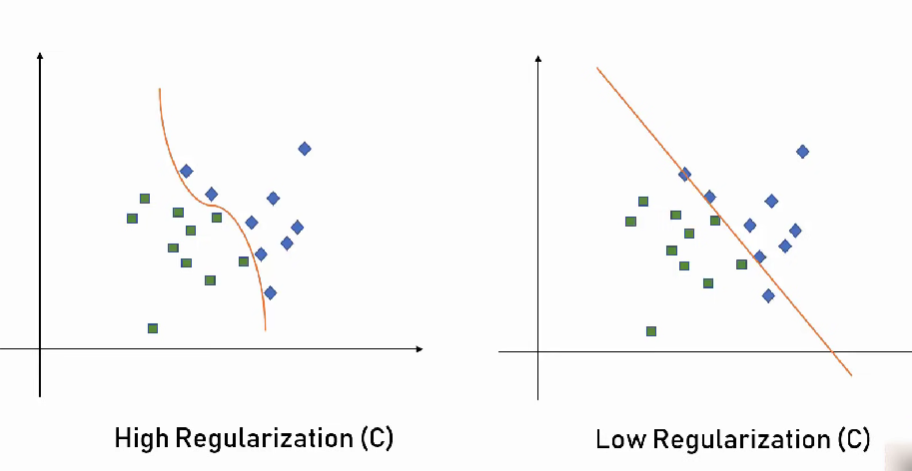

* High Regularization overfitting durumuna düşebilir ve low Regularization ise hata verilerine neden olabilir şekildeki mavi gibi. 



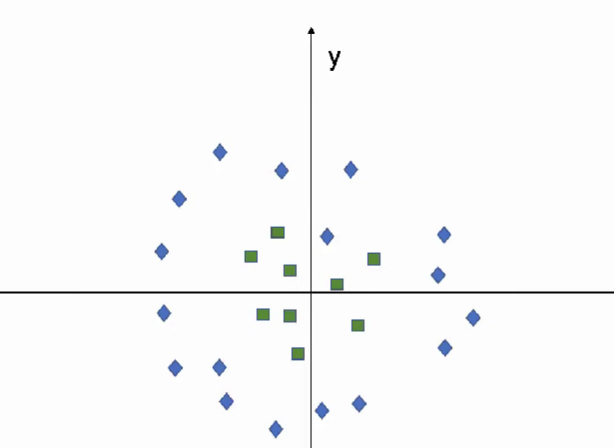 

Şekildeki gibi bir veri setini ayırmak zor olabilir. Ancak üçüncü bir boyut yaratmak yani z boyutu eklenirse; 
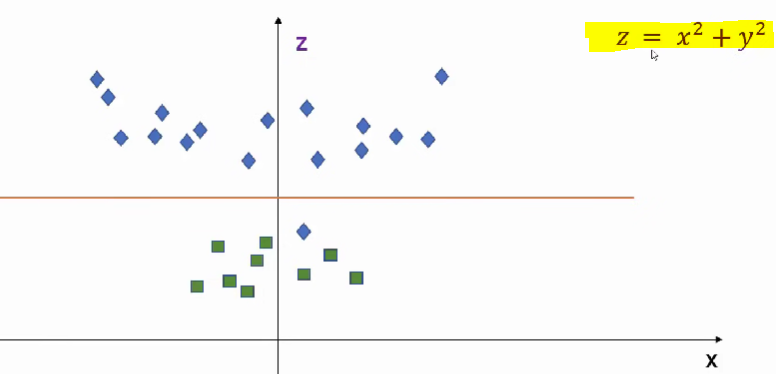
* Bu dönüşüme kernel denir.

* Temel özelliklerde bazı dönüşümler yapmak ve yeni özellik oluşturmak ve bununla bir karar sınırı çizmek.

* bir kere karar sınırı çizdikten sonra onu x ve y düzlemine bindirebiliriz.

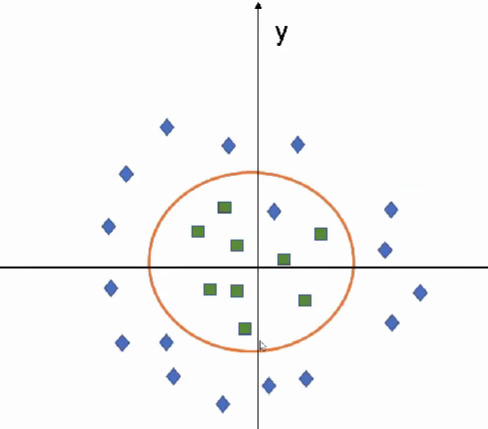

ve sonucunda böyle bir sınır elde edilir. 


## CODE

NOT: Bir fonksiyonun parametrelerini  ve neler alabileceğini görmek için shift+tab yap!

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris= load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df= pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df["target"]=iris.target
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [18]:
# target 1, 2, 3 olarak farklı değer aralıklarında değerler alıyor. 
# 0-50 arası 0 yani- setosa
# 50-100 arası 1 yani- versicolor
# 100-150 arası 2 yani- virginica 
# bu değerler veri setine target olarak eklendikten sonra name olarak da göstermek

# bunun için target değerine karşılık gelen iris veri setinde bulunan
# target_names değeri kullanılır.
df["flower_name"]= df.target.apply( lambda x: iris.target_names[x])
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [19]:
# her çiçek türünü ayırarak ayrı dataFrame oluşturarak sonrasında 
# grafik işlemleri yapılır;

df0= df[:50]
df1= df[50:100]
df2= df[100:150]

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

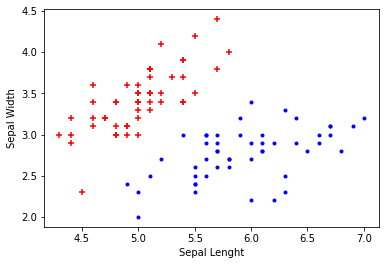

In [22]:
# sepal özelliğine göre; 
plt.xlabel('Sepal Lenght')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color="red", marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color="blue", marker='.')
#plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color="grey", marker='*')


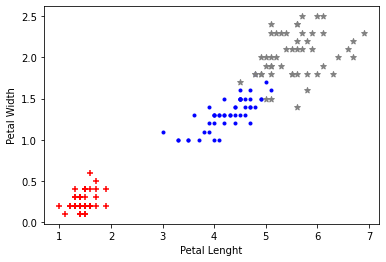

In [25]:
# Petal özelliğine göre; 
plt.xlabel('Petal Lenght')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color="red", marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="blue", marker='.')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color="grey", marker='*')


Yukarıdaki işlemlere bakıldığında Petal özelliğinde daha net bir ayrım vardır.

#### Train using Support Vector Machine (SVM)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
from sklearn.svm import SVC
model = SVC()

Burada SCV içerisinde bulunan 
* C
* gamma
* kernel 
Değerleri değiştirilerek veri setinde işlemler yapılabilir.

In [30]:
model.fit(X_train, y_train)

SVC()

In [36]:
model.score(X_test, y_test)

0.9666666666666667

In [32]:
model.predict([[4.8,3.0,1.5,0.3]])

array([0])

C(Regularization), gamma ve kernel üzerinde değişiklikler yaparsak;

NOT: model overfit olmuşsa C, gamma düşürülür gibi özellikler notlarda yazılmıştı.

In [33]:
model2=SVC(C=100)

In [34]:
model2.fit(X_train,y_train)

SVC(C=100)

In [35]:
model2.score(X_test, y_test)

1.0

In [40]:
model3= SVC(gamma=1000)

In [41]:
model3.fit(X_train,y_train)

SVC(gamma=1000)

In [42]:
model3.score(X_test, y_test)

0.3

In [43]:
model4=SVC(kernel='linear') 
#'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or a callable. değerleri alabiliyor

In [44]:
model4.fit(X_train,y_train)

SVC(kernel='linear')

In [45]:
model4.score(X_test, y_test)

1.0

# Exercise

In [46]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [48]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [50]:
digits.target
# hedef değerler

array([0, 1, 2, ..., 8, 9, 8])

In [53]:
len(digits.target)

1797

In [54]:
len(digits.data)

1797

In [51]:
digits.target_names
# bu verilerin alabileceği değerler, isimleri

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [52]:
#??
df = pd.DataFrame(digits.data,digits.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [55]:
df['target'] = digits.target
df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis='columns'), df.target, test_size=0.2)

#### Using RBF kernel

In [57]:
from sklearn.svm import SVC
rbf_model = SVC(kernel='rbf')

In [58]:
len(X_train)

1437

In [59]:
len(X_test)

360

In [60]:
rbf_model.fit(X_train, y_train)

SVC()

In [61]:
rbf_model.score(X_test,y_test)

0.9888888888888889

#### Using Linear kernel

In [62]:
linear_model = SVC(kernel='linear')
linear_model.fit(X_train,y_train)

SVC(kernel='linear')

In [63]:
linear_model.score(X_test,y_test)

0.9861111111111112